In [0]:
import numpy as np # needed for array operations
import matplotlib.pyplot as plt # to show the images
import os # to iterate through directories join paths 
import cv2 
import random  # used for shuffling the dataset
import pickle  # used for saving the model


DATADIR = "/content"
CATEGORIES = ["And", "Or"]

# iterate through categories
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to all the categories that we have (currently we have 2: Ands and Ors)
    # once we have the path to each category we can iterate through them 
    for img in os.listdir(path):
        # color is not a differentiating factor between ands and ors and also a grayscale image is less in size than an RGB image
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # store the full path to each image in an array
   

In [169]:
print(img_array.shape)

(87, 229)


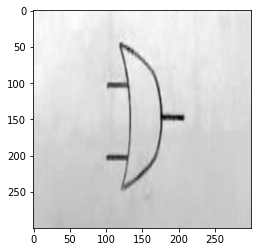

In [170]:
# Normalization of images
# Keeping them all the same size for simplicity

IMG_SIZE = 300
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [0]:
# Create training dataset

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to all the categories that we have (currently we have 2: Ands and Ors)
        class_num = CATEGORIES.index(category)
        # once we have the path to each category we can iterate through them 
        for img in os.listdir(path):
            # color is not a differentiating factor between ands and ors and also a grayscale image is less in size than an RGB image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # store the full path to each image in an array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass # if there is an exception like a broken image or anything just pass it
            
            
create_training_data()

In [172]:
print(len(training_data))

286


In [0]:
#  shuffling the dataset so that the model learns better

random.shuffle(training_data)

In [174]:
for sample in training_data[ : 10]:
    print(sample[1]) # sample[0] is the actual image array itself
    

0
0
1
0
1
1
1
1
1
0


In [0]:
# now we are gonna put our shuffled data in two variables X, and Y before we feed it into our neural networks
X = []  # feature set 
Y = []  # labels

for features, lables in training_data:
    X.append(features)  # new_array that contaings images
    Y.append(lables)  # class_num that contains the index of the image (0 -> and, 1 -> or)
    
# convert X into a numpy array but keep Y as it is (a list)
X = np.array(X, np.float32).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # where -1 is the size of the array of image (it could be any number) and 1 as they are grayscale
Y = np.array(Y, np.float32)



In [0]:
#  for saving data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()



In [0]:
# for reading data

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [178]:
#X[1]
Y[1]

0.0

# Neural Network


In [179]:
import tensorflow as tf
#from tensorflow.keras.models import sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)
# Data Normalization
X = X/255.0

# FIRST CNN LAYER
model = Sequential()  # simple sequential model
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))  # start with the convolutional layer, then specify the window(3 x 3)
model.add(Activation("relu"))  # activation layer (rectifying linear)
model.add(MaxPooling2D(pool_size=(2, 2)))

# SECOND CNN LAYER
model = Sequential()  # simple sequential model
model.add(Conv2D(64, (3, 3)))  # start with the convolutional layer, then specify the window(3 x 3)
model.add(Activation("relu"))  # activation layer (rectifying linear)
model.add(MaxPooling2D(pool_size=(2, 2)))

# ADD A FINAL DENSE LAYER
# since the dense layer is a 1-D dataset so we must flatten the datafirst
model.add(Flatten())
model.add(Dense(64))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X, Y, batch_size=5, epochs=10, validation_split=0.2)   # if the data is huge (billions) make the samples go in thounsand per one go, in the tutorial the number was 32






Epoch 1/10
46/46 [==============================] - 38s 833ms/step - loss: 60.8432 - accuracy: 0.4825 - val_loss: 0.7710 - val_accuracy: 0.5345
Epoch 2/10
46/46 [==============================] - 38s 818ms/step - loss: 0.5713 - accuracy: 0.6930 - val_loss: 0.6036 - val_accuracy: 0.6552
Epoch 3/10
46/46 [==============================] - 37s 814ms/step - loss: 0.3655 - accuracy: 0.8158 - val_loss: 0.6006 - val_accuracy: 0.7586
Epoch 4/10
46/46 [==============================] - 38s 824ms/step - loss: 0.3558 - accuracy: 0.8728 - val_loss: 2.2201 - val_accuracy: 0.5345
Epoch 5/10
46/46 [==============================] - 38s 830ms/step - loss: 0.2730 - accuracy: 0.9079 - val_loss: 0.5613 - val_accuracy: 0.7931
Epoch 6/10
46/46 [==============================] - 38s 831ms/step - loss: 0.6163 - accuracy: 0.8728 - val_loss: 0.8415 - val_accuracy: 0.6724
Epoch 7/10
46/46 [==============================] - 41s 883ms/step - loss: 0.2042 - accuracy: 0.9342 - val_loss: 0.6411 - val_accuracy: 0.706

Saved model to disk
INFO:tensorflow:Assets written to: CNN.model/assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


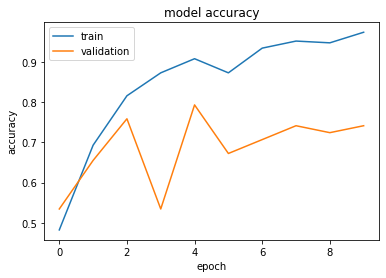

In [180]:


# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')




In [217]:

model = tf.keras.models.load_model("CNN.model")
def prepare(file_name):
  image = cv2.imread("/content/test/"+file_name, cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  image = np.array(image, np.float32).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  return model.predict(image)



test_dir = "/content"
CATEGS = ["test"]

# iterate through categories
for categ in CATEGS:
    path = os.path.join(test_dir, categ)  # path to all the categories that we have (currently we have 2: Ands and Ors)
    # once we have the path to each category we can iterate through them 
    for img in os.listdir(path):
        prediction = prepare(img)
        prediction = list(prediction[0])
        #print(CATEGORIES[prediction.index(max(prediction))])
        #print(CATEGORIES[prediction.index(min(prediction))])
        print(CATEGORIES[int(prediction[0])])



And
Or
Or
And
Or
